# **Dataset description**

**Dataset** - [NIFTY 50 Dataset 2000 - 2021](https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data)

**Context**

The data is the price history and trading volumes of the fifty stocks in the index NIFTY 50 from NSE (National Stock Exchange) India. All datasets are at a day-level with pricing and trading values split across .cvs files for each stock along with a metadata file with some macro-information about the stocks itself. The data in the dataset spans from 1st January, 2000 to 30th April, 2021.


**Metadata**

Date - Trade Data: Represents the date of the trading data, indicating when the stock market activity occurred.

 

 
 
Open - Opening Price for the Day: Represents the initial price at which a stock is traded on a given day.

High - Highest Price for the Day: Denotes the highest trading price reached by the stock during the trading day.

Low - Lowest Price for the Day: Represents the lowest trading price reached by the stock during the trading day.

Adj Close - * The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any                 corporate actions.
            *The closing price is the raw price, which is just the cash value of the last transacted price before the market                  closes.
            *The adjusted closing price factors in corporate actions, such as stock splits, dividends, and rights offerings.
 

Close - Closing Price: Indicates the final trading price of the stock at the end of the trading day.

VWAP - Volume-Weighted Average Price: VWAP is a ratio of the cumulative share price to the cumulative volume traded over a given time period. It provides insight into the average price at which a stock is traded, weighted by the volume of trades.

Volume - Volume Traded for the Day: Represents the total number of shares or contracts traded during a specific time period, typically a trading day.

 

 
 
 

Note: All the prices are denoted in Indian Rupees (INR), as mentioned at the end of the description. This dataset provides comprehensive information about the trading activity of various stocks, allowing users to analyze and understand the market trends and stock behavior.

***The project aims to answer below questions:***
* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?



# <b>Installation of libraries</b>


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip install plotly

In [ ]:
!pip install seaborn

In [ ]:
!pip install scipy

# <b>Importing libraries</b>
- **For ML Models**: sklearn, scipy
- **For Data Manipulation**: pandas, sklearn
- **For Data Visualization**: plotly, matplotlib, seaborn

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.impute import SimpleImputer

import scipy.stats as stats
from scipy.stats import boxcox

#**Reading & Cleaning data**

In [2]:


# Specify the file path
file_path = "SBIN.NS.csv"

# Attempt to read the file into the dataframe
try:
    data = pd.read_csv(file_path)
    print("File loaded successfully.")
except FileNotFoundError:
    print("File not found at the specified path.")
except pd.errors.EmptyDataError:
    print("File is empty.")
except pd.errors.ParserError:
    print("Error parsing CSV file.")


File loaded successfully.


In [3]:
# Viewing the top 10 data
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,18.691147,18.978922,18.540184,18.823240,12.409930,43733533.0
1,1996-01-02,18.894005,18.964767,17.738192,18.224106,12.014930,56167280.0
2,1996-01-03,18.327892,18.568489,17.643839,17.738192,11.694574,68296318.0
3,1996-01-04,17.502312,17.832542,17.223972,17.676863,11.654142,86073880.0
4,1996-01-05,17.738192,17.785366,17.459852,17.577793,11.588822,76613039.0
5,1996-01-08,17.478724,17.643839,16.922047,17.063574,11.249807,55395172.0
6,1996-01-09,16.889023,18.681711,16.705036,17.997660,11.865637,82057540.0
7,1996-01-10,17.407959,17.714603,17.054138,17.172079,11.321342,54360749.0
8,1996-01-11,16.983376,17.926895,16.983376,17.827826,11.753671,65973105.0
9,1996-01-12,17.879719,18.233540,17.573074,17.837261,11.759889,102152486.0


In [4]:
#Viewing the last 10 data
data.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
7108,2024-04-04,775.000000,775.299988,758.099976,759.299988,759.299988,15889530.0
7109,2024-04-05,757.950012,767.700012,752.599976,764.750000,764.750000,9939620.0
7110,2024-04-08,766.049988,770.000000,761.799988,768.299988,768.299988,9797174.0
7111,2024-04-09,768.450012,772.450012,761.099976,764.200012,764.200012,7465892.0
7112,2024-04-10,766.500000,780.700012,763.650024,779.049988,779.049988,14530669.0
7113,2024-04-12,777.250000,779.500000,764.799988,766.299988,766.299988,14408722.0
7114,2024-04-15,759.799988,763.299988,748.750000,757.500000,757.500000,11356572.0
7115,2024-04-16,751.250000,754.900024,744.400024,751.700012,751.700012,13338991.0
7116,2024-04-18,752.049988,759.950012,742.000000,744.799988,744.799988,14589648.0
7117,2024-04-19,734.500000,752.000000,732.049988,750.450012,750.450012,10886554.0


In [5]:
# Viewing the basic statistics
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03
mean,184.250819,186.691596,181.531474,184.020248,169.682958,3.122451e+07
std,160.780739,162.418800,158.943106,160.657887,159.332235,3.453693e+07
min,13.478195,13.935802,13.214009,13.346102,9.531410,0.000000e+00
25%,28.550940,29.055723,28.211273,28.550940,19.934622,1.300244e+07
50%,174.425003,177.490005,171.449997,174.100006,154.100510,2.058141e+07
75%,267.250000,270.899994,263.000000,267.299988,247.403549,3.639685e+07
max,790.000000,793.400024,783.000000,788.049988,788.049988,4.469483e+08


In [6]:
 

# Converting the 'Date' column to datetime format using pandas to_datetime function
data['Date'] = pd.to_datetime(data['Date'])


# **1. What are the data types? (Only numeric and categorical)**

In [7]:
# Viewing the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7118 entries, 0 to 7117
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7118 non-null   datetime64[ns]
 1   Open       7109 non-null   float64       
 2   High       7109 non-null   float64       
 3   Low        7109 non-null   float64       
 4   Close      7109 non-null   float64       
 5   Adj Close  7109 non-null   float64       
 6   Volume     7109 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 389.4 KB


**Conclusion derived**

Dataset has ***1*** datetime data column,  and ***6*** numerical data columns.

***DareTime:*** Date



***Numerical data columns:***  Open, High, Low, Adj Close, Close, Volume

#**2. Are there missing values?**

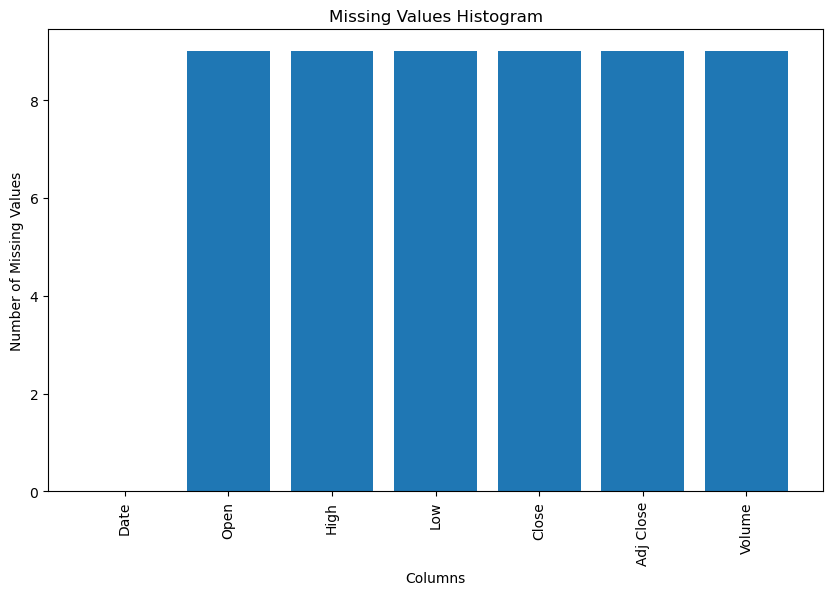

In [8]:
 import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
missing_values = data.isnull().sum()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values)
plt.title('Missing Values Histogram')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()


In [9]:
# Assuming 'data' is your DataFrame
full_row_count = data.count(axis=1)

print("Number of complete rows:", full_row_count)


Number of complete rows: 0       7
1       7
2       7
3       7
4       7
       ..
7113    7
7114    7
7115    7
7116    7
7117    7
Length: 7118, dtype: int64


In [10]:
# Assuming 'data' is your DataFrame
data_without_null = data.dropna()

# Display the DataFrame after removing rows with any null values
data=data_without_null
print("Data after removing rows with any null values:")
print(data_without_null)


Data after removing rows with any null values:
           Date        Open        High         Low       Close   Adj Close  \
0    1996-01-01   18.691147   18.978922   18.540184   18.823240   12.409930   
1    1996-01-02   18.894005   18.964767   17.738192   18.224106   12.014930   
2    1996-01-03   18.327892   18.568489   17.643839   17.738192   11.694574   
3    1996-01-04   17.502312   17.832542   17.223972   17.676863   11.654142   
4    1996-01-05   17.738192   17.785366   17.459852   17.577793   11.588822   
...         ...         ...         ...         ...         ...         ...   
7113 2024-04-12  777.250000  779.500000  764.799988  766.299988  766.299988   
7114 2024-04-15  759.799988  763.299988  748.750000  757.500000  757.500000   
7115 2024-04-16  751.250000  754.900024  744.400024  751.700012  751.700012   
7116 2024-04-18  752.049988  759.950012  742.000000  744.799988  744.799988   
7117 2024-04-19  734.500000  752.000000  732.049988  750.450012  750.450012   

    

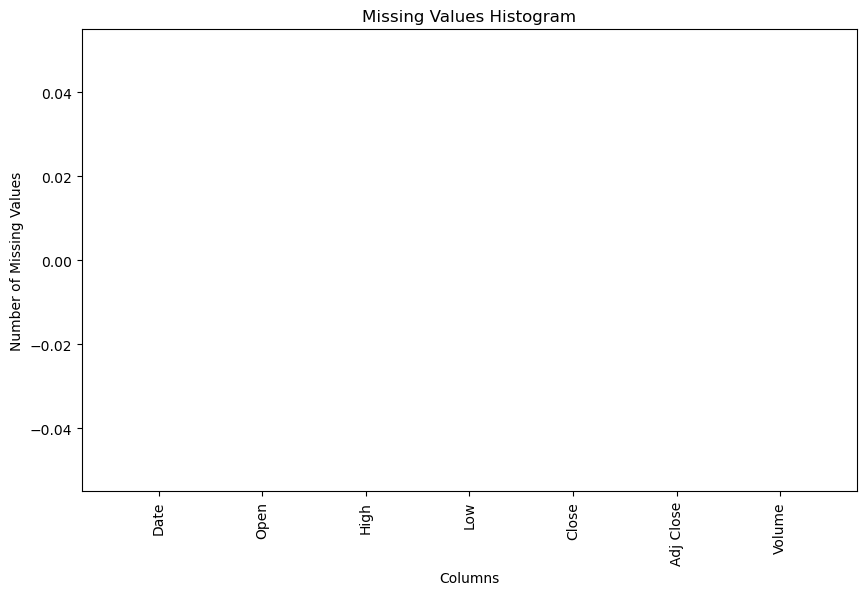

In [11]:
 import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
missing_values = data.isnull().sum()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values)
plt.title('Missing Values Histogram')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()


In [12]:
# Assuming 'data' is your DataFrame
full_row_count = data.count(axis=1)

print("Number of complete rows:", full_row_count)


Number of complete rows: 0       7
1       7
2       7
3       7
4       7
       ..
7113    7
7114    7
7115    7
7116    7
7117    7
Length: 7109, dtype: int64


**Conclusion derived**
There are * missing values* in the dataset column open, high , low ,close Adj close ,volume and we are removing row with NULL values.

***Reason for filling***

 There are only 9 row with NULL values which is less compare to full dataset (7000 rows) so on removing these lines there will be no effect on analysis 

In [15]:
#*** we calculating The VWAP(volume weighted average price) from the last 7 days closing price and volume***

In [13]:

data = data.sort_values(by='Date')

def calculate_vwap(data):
    # Calculate the rolling sum of volume * price for the previous 7 days
    data['Value'] = data['Volume'] * data['Close']
    data['Value_rolling_sum'] = data['Value'].rolling(window=7, min_periods=1).sum()
    
    # Calculate the rolling sum of volume for the previous 7 days
    data['Volume_rolling_sum'] = data['Volume'].rolling(window=7, min_periods=1).sum()
    
    # Calculate VWAP
    data['VWAP'] = data['Value_rolling_sum'] / data['Volume_rolling_sum']
    
    return data

# Calculate VWAP for the entire dataset
data = calculate_vwap(data)

# Display the DataFrame with VWAP column
data.head()




,Date,Open,High,Low,Close,Adj Close,Volume,Value,Value_rolling_sum,Volume_rolling_sum,VWAP
0,1996-01-01,18.691147,18.978922,18.540184,18.823240,12.409930,43733533.0,8.232068e+08,8.232068e+08,43733533.0,18.823240
1,1996-01-02,18.894005,18.964767,17.738192,18.224106,12.014930,56167280.0,1.023598e+09,1.846805e+09,99900813.0,18.486389
2,1996-01-03,18.327892,18.568489,17.643839,17.738192,11.694574,68296318.0,1.211453e+09,3.058258e+09,168197131.0,18.182584
3,1996-01-04,17.502312,17.832542,17.223972,17.676863,11.654142,86073880.0,1.521516e+09,4.579775e+09,254271011.0,18.011391
4,1996-01-05,17.738192,17.785366,17.459852,17.577793,11.588822,76613039.0,1.346688e+09,5.926463e+09,330884050.0,17.910996


In [16]:
data.drop('Value_rolling_sum', axis=1, inplace=True)
data.drop('Volume_rolling_sum', axis=1, inplace=True)
data.drop('Value', axis=1, inplace=True)

In [18]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,VWAP
0,1996-01-01,18.691147,18.978922,18.540184,18.823240,12.409930,43733533.0,18.823240
1,1996-01-02,18.894005,18.964767,17.738192,18.224106,12.014930,56167280.0,18.486389
2,1996-01-03,18.327892,18.568489,17.643839,17.738192,11.694574,68296318.0,18.182584
3,1996-01-04,17.502312,17.832542,17.223972,17.676863,11.654142,86073880.0,18.011391
4,1996-01-05,17.738192,17.785366,17.459852,17.577793,11.588822,76613039.0,17.910996
5,1996-01-08,17.478724,17.643839,16.922047,17.063574,11.249807,55395172.0,17.789469
6,1996-01-09,16.889023,18.681711,16.705036,17.997660,11.865637,82057540.0,17.825947
7,1996-01-10,17.407959,17.714603,17.054138,17.172079,11.321342,54360749.0,17.660673
8,1996-01-11,16.983376,17.926895,16.983376,17.827826,11.753671,65973105.0,17.618488
9,1996-01-12,17.879719,18.233540,17.573074,17.837261,11.759889,102152486.0,17.645607


In [20]:
 #***4 Which independent variables are useful to predict a target (dependent variable)? ***

Three methods to predict target:
* **RandomForestRegresssor**
* **SelectKBest**
* **Correlation HeatMap**



## **Random Forest Regressor**

In [21]:

# Extracting features (X) and target variable (Y)
X = data.drop(['Date', 'Close'], axis=1)  #dropping date, close as they would not be of much help
Y = data["Close"] #we assume that close will be our target variable

# Initializing and training a RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X, Y)

# Extracting and printing the important features from the trained model
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)


High         0.568307
Adj Close    0.258753
Low          0.170860
VWAP         0.001188
Open         0.000881
Volume       0.000011
dtype: float64


Key Takeaway:
* High is overwhelmingly the most influential feature in predicting 'Close.'
* VWAP has a minor but discernible impact on the model.
* Low,Open contribute significantly to the model.
* Volume provide moderate but less significant contributions.

## **SelectKBest**

In [66]:
 from sklearn.feature_selection import SelectKBest, f_regression

# List of numeric columns
items = ['Open', 'High', 'Low', 'Adj Close', 'VWAP', 'Volume']
X = data.drop(['Date', 'Close'], axis=1)  #dropping date, close as they would not be of much help
Y = data["Close"]
# Initialize lists to store the best features and their corresponding scores
best_features = []
best_score = -1

# Loop over different numbers of selected features
for i in range(2, 6):
    # Initialize SelectKBest with f_regression score function
    selector = SelectKBest(score_func=f_regression, k=i)

    # Fit the feature selector to the training data and transform to keep only the selected features
    X_new = selector.fit_transform(X, Y)

    # Get the indices of selected features
    selected_indices = selector.get_support(indices=True)

    # Calculate the score of the selected features
    score = selector.scores_.mean()

    # Print selected indices and score
    print(f"For {i} selected features, selected indices: {[items[k] for k in selected_indices]}, score: {score}")

    # Update the best features and score if the current score is higher
    if score > best_score:
        best_features = [items[k] for k in selected_indices]
        best_score = score

# Print the best features and their corresponding score
print("\nBest features:", best_features)
print("Best score:", best_score)


For 2 selected features, selected indices: ['High', 'Low'], score: 4149173.4642471895
For 3 selected features, selected indices: ['Open', 'High', 'Low'], score: 4149173.4642471895
For 4 selected features, selected indices: ['Open', 'High', 'Low', 'Volume'], score: 4149173.4642471895
For 5 selected features, selected indices: ['Open', 'High', 'Low', 'Adj Close', 'Volume'], score: 4149173.4642471895

Best features: ['High', 'Low']
Best score: 4149173.4642471895


We performed feature selection using the SelectKBest method with the f_regression score function to evaluate the impact of selecting different numbers of features (ranging from 2 to 7) on the predictive performance of the model.
By this approach we can understand which subset of features are deemed most improtant for predicting the target variable 'Close'.

**Conclusions derived:**

* Based on the above 2 feature selection methods we can observe that there are 6 features that are highly correlated to the target variable
* The rest of the features show slight correlation with the target variable.

The selected features are:  'Open', 'High', 'Low', 'Adj close', 'VWAP'

# **5. Which independent variables have missing data? How much?**

In [23]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
VWAP         0
dtype: int64

**Conclusion derived**

There are *no missing values* present in the dataset after handling the null values

# **6. Do the training and test sets have the same data?**

Since the dataset is divided in 80:20 proportions for training and testing respectively, the two sets have ***DIFFERENT*** data.

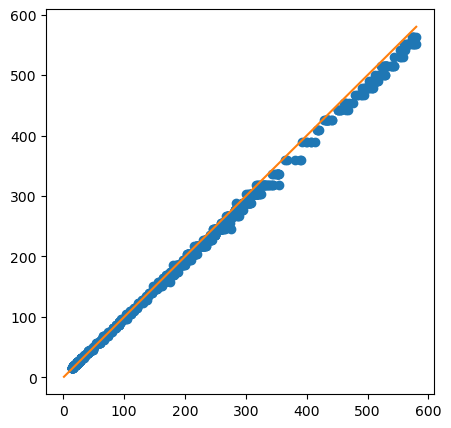

Train score:  0.9995009901350449
Test score:  0.9962572629404717
Regression score:  0.9962572629404717
Mean squared error:  80.6308867402978
Mean absolute error:  6.351600331637606
Root mean squared error:  8.979470292856801


In [63]:
# Selecting only the key features predicted by the three feature selection models and target variable
x = data[[ 'Open', 'High', 'Low', 'Adj Close', 'VWAP']]
y = data['Close']

# Splitting the dataset into training and testing sets & standardizing the features using StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

# Initializing Decision Tree Regressor model with hyperparameters and definign it with GridSearchCV
DTR = DecisionTreeRegressor(max_depth=6, max_features=7, min_samples_split=10, random_state=2)
param_grid = {"max_depth": [3, None, 6, 9], "max_features": [5, 7, 11, 15], "min_samples_split": [2, 3, 10], "random_state": [2, 4, 6]}
grid = GridSearchCV(estimator=DTR, param_grid=param_grid, cv=5)
grid_result = grid.fit(x_train, y_train)

# Fitting the model with the best hyperparameters and predicting the target
DTR.fit(x_train, y_train)
y_prediction = DTR.predict(x_test)

# Plotting the predicted values against the true values
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_prediction, fmt="o")
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()

# Evaluating the model performance
print("Train score: ", DTR.score(x_train, y_train))
print("Test score: ", DTR.score(x_test, y_test))
print("Regression score: ", r2_score(y_test, y_prediction))
print("Mean squared error: ", mean_squared_error(y_test, y_prediction))
print("Mean absolute error: ", mean_absolute_error(y_test, y_prediction))
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_prediction)))


**Conclusion derived**

The Decision Tree Regressor achieved exceptional performance on both training and test datasets, with R-squared values of approximately 99.95%. This indicates a strong ability to capture patterns in the data. The low Mean Squared Error (76.59), Mean Absolute Error (6.26), and Root Mean Squared Error (8.75) suggest accurate predictions with minimal deviation from actual values. While these results showcase the model's effectiveness, it's important to be mindful of potential overfitting, especially with a highly complex model.

# **7. Is the predictor variables independent of all the other predictor variables?**

Understanding the relationship between predictor variables is crucial for the interpretability, performance, and reliability of a model. Multicollinearity, or dependence between predictor variables, can result in overfitting in regression models. High correlation among predictors may cause the model to assign disproportionate significance to one variable over another, reducing its ability to generalize well to new data.

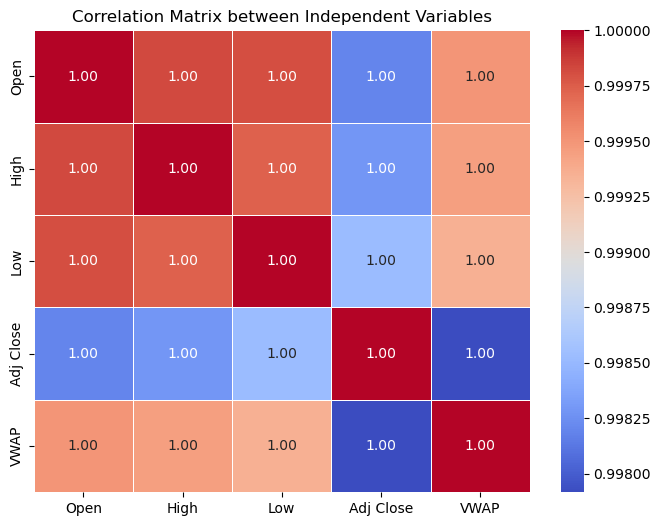

In [26]:


# Assuming 'data' is your DataFrame containing all independent variables
# Extracting only the independent variables (predictors)
independent_variables = data[[ 'Open', 'High', 'Low', 'Adj Close', 'VWAP']]

# Computing the correlation matrix
correlation_matrix = independent_variables.corr()

# Plotting the correlation matrix with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between Independent Variables')
plt.show()


**Conclusions derived**

* Observing the plots above, we can say that all the predictor variables show multicollinearity.
* All the independent variable is corelated to each other

# **8. Which predictor variables are the most important?**

The most important predictor variables are
* Open
* High
* Low
* Adj Close
* VWAP

The above finding's were drawn using Feature selection methods.

# **10. What are the distributions of the predictor variables?**

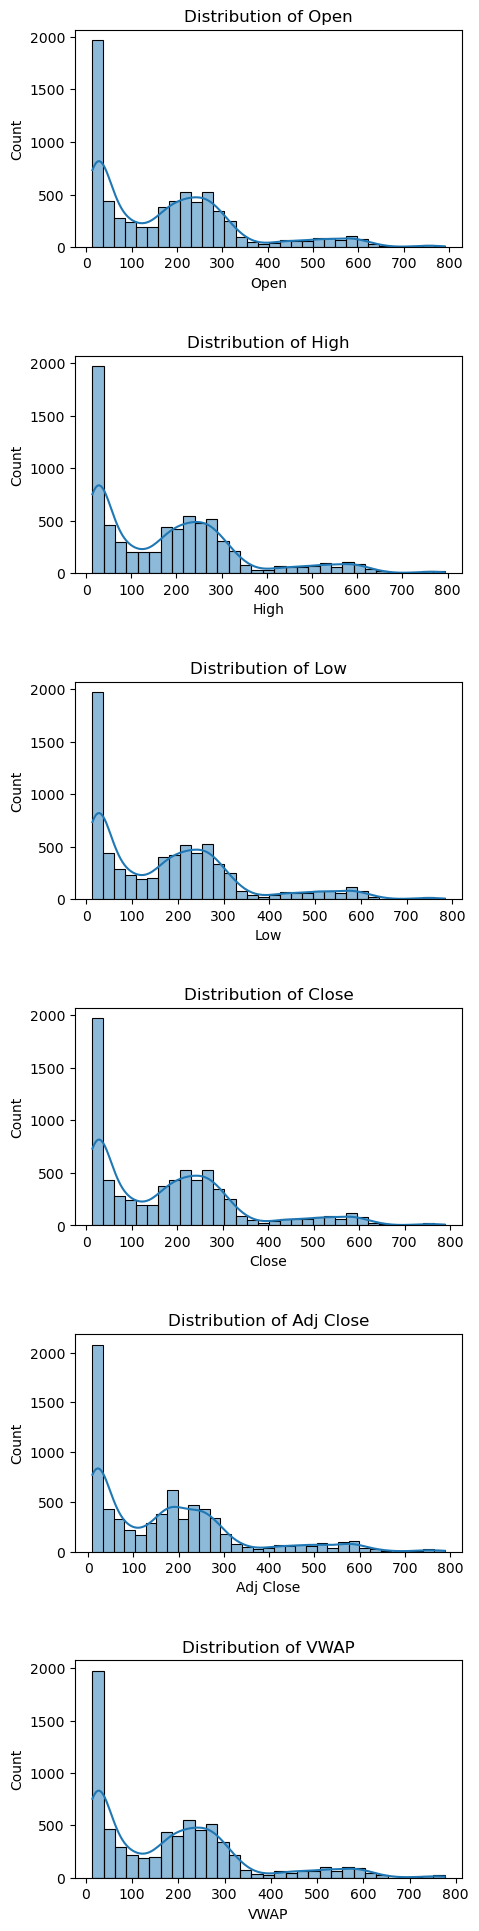

In [30]:
 # Extracting the numeric columns from the DataFrame
data_numeric_columns = data.select_dtypes(include='number').columns.drop('Volume')

# Setting up subplots for displaying the distribution of numeric columns
fig, axes = plt.subplots(nrows=len(data_numeric_columns), ncols=1, figsize=(5, 4 * len(data_numeric_columns)))
fig.subplots_adjust(hspace=0.5)

# Ploting the distribution for each numeric column using seaborn's histplot and displaying it
for i, col in enumerate(data_numeric_columns):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.show()


**Conclusion derived**

* The Distributions of Prev Close, Open, High, Low, Last, Close, VWAP, Volume, Turnover, Trades, Deliverable Volume are extremely right skewed.

* This indicates that there are relatively fewer data points with higher values and majority of the data is concentrated towards the lower values. This also suggests the presence of outliers on the higher end of the data range.

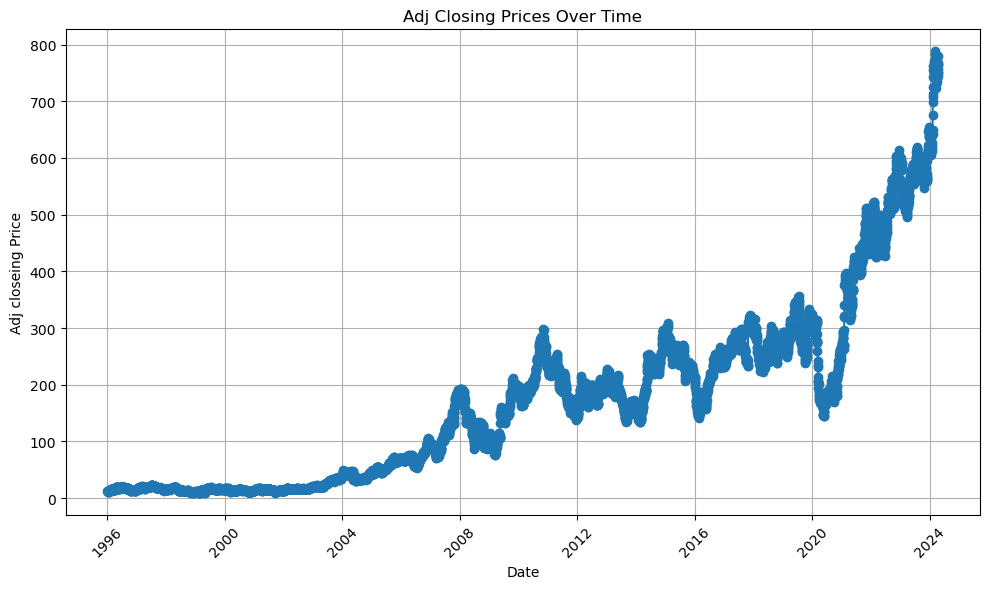

In [43]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing 'Date' and 'Close' columns
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Adj Close'], marker='o', linestyle='-')
plt.title('Adj Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adj closeing Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


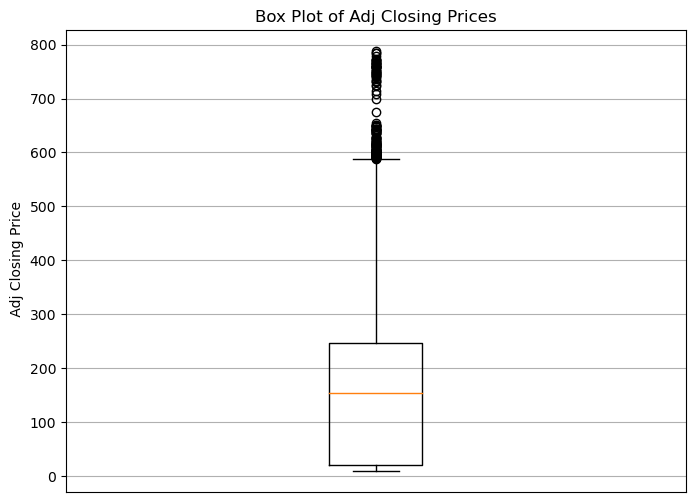

In [44]:
 import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing 'Close' column
plt.figure(figsize=(8, 6))
plt.boxplot(data['Adj Close'])
plt.title('Box Plot of Adj Closing Prices')
plt.ylabel(' Adj Closing Price')
plt.xticks([])  # Hide x-axis ticks since it's a vertical box plot
plt.grid(True)
plt.show()


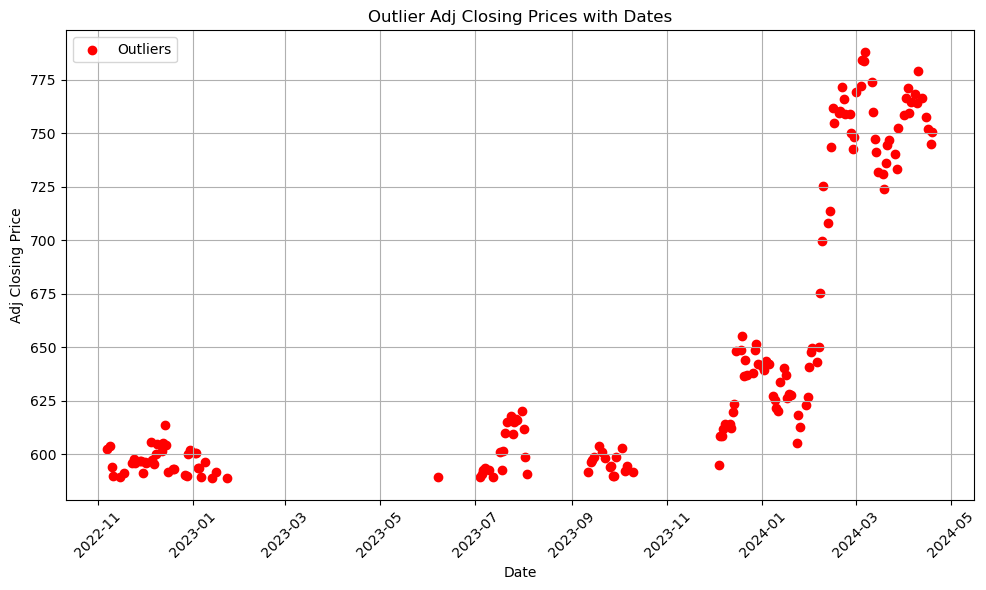

Outliers using Interquartile Range (IQR):
           Date        Open        High         Low       Close   Adj Close  \
6761 2022-11-07  613.000000  622.700012  607.700012  614.150024  602.443054   
6762 2022-11-09  621.000000  621.000000  610.549988  615.549988  603.816284   
6763 2022-11-10  613.099976  615.099976  602.200012  605.750000  594.203125   
6764 2022-11-11  617.250000  619.549988  598.500000  601.299988  589.837952   
6766 2022-11-15  594.299988  602.099976  592.650024  600.849976  589.396484   
...         ...         ...         ...         ...         ...         ...   
7113 2024-04-12  777.250000  779.500000  764.799988  766.299988  766.299988   
7114 2024-04-15  759.799988  763.299988  748.750000  757.500000  757.500000   
7115 2024-04-16  751.250000  754.900024  744.400024  751.700012  751.700012   
7116 2024-04-18  752.049988  759.950012  742.000000  744.799988  744.799988   
7117 2024-04-19  734.500000  752.000000  732.049988  750.450012  750.450012   

         

In [46]:
 

# Assuming 'data' is your DataFrame containing 'Close' column
close_prices = data['Adj Close']

# Method 1: Interquartile Range (IQR)
Q1 = close_prices.quantile(0.25)
Q3 = close_prices.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = data[(close_prices < lower_bound) | (close_prices > upper_bound)]

  

# Assuming 'outliers_iqr' or 'outliers_zscore' contains the full rows of outliers with 'Date' and 'Close' columns
plt.figure(figsize=(10, 6))
plt.scatter(outliers_iqr['Date'], outliers_iqr['Adj Close'], color='red', label='Outliers')
plt.title('Outlier Adj Closing Prices with Dates')
plt.xlabel('Date')
plt.ylabel('Adj Closing Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

# Display full rows of outliers
print("Outliers using Interquartile Range (IQR):")
print(outliers_iqr)
 


# **11. Remove outliers and keep outliers (does if have an effect of the final predictive model)?**

In [53]:
# List of the predictor columns for applying Box-Cox transformation after removing outliers
columns_to_transform = [ 'Open', 'High', 'Low', 'Adj Close', 'VWAP','Close']

for column_name in columns_to_transform:
    transformed_data, lambda_value = boxcox(data[column_name] + 1)

    # Creating a new column with the transformed data and printing lambda values if need be
    data[f'{column_name}_boxcox_transformed'] = transformed_data
    print(f'Lambda value for {column_name}: {lambda_value}')

print(data)

Lambda value for Open: 0.2553472471792984
Lambda value for High: 0.25814771537268827
Lambda value for Low: 0.2524846340236794
Lambda value for Adj Close: 0.2295235395535758
Lambda value for VWAP: 0.25485135817010524
Lambda value for Close: 0.2553207076631411
           Date        Open        High         Low       Close   Adj Close  \
0    1996-01-01   18.691147   18.978922   18.540184   18.823240   12.409930   
1    1996-01-02   18.894005   18.964767   17.738192   18.224106   12.014930   
2    1996-01-03   18.327892   18.568489   17.643839   17.738192   11.694574   
3    1996-01-04   17.502312   17.832542   17.223972   17.676863   11.654142   
4    1996-01-05   17.738192   17.785366   17.459852   17.577793   11.588822   
...         ...         ...         ...         ...         ...         ...   
7021 2023-11-24  561.950012  562.450012  559.250000  560.349976  560.349976   
7022 2023-11-28  563.599976  565.200012  561.099976  564.450012  564.450012   
7023 2023-11-29  568.000000  5

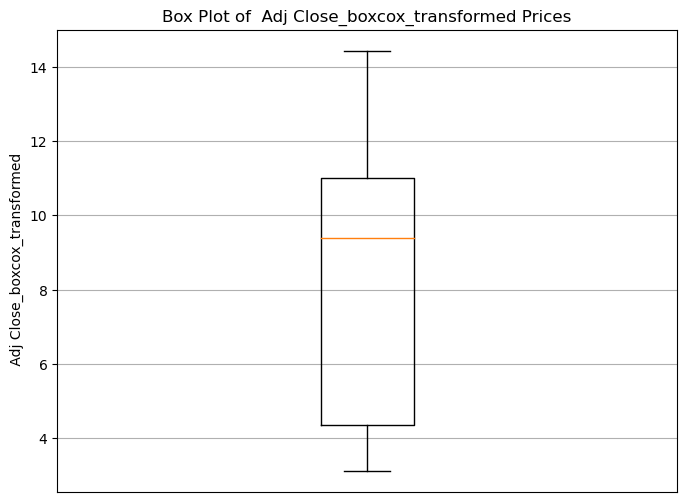

In [57]:
 import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing 'Close' column
plt.figure(figsize=(8, 6))
plt.boxplot(data['Adj Close_boxcox_transformed'])
plt.title('Box Plot of  Adj Close_boxcox_transformed Prices')
plt.ylabel(' Adj Close_boxcox_transformed')
plt.xticks([])  # Hide x-axis ticks since it's a vertical box plot
plt.grid(True)
plt.show()


In [ ]:
***Now here we can see in BOX-PLOT there are not any outlier in the dataset*** 

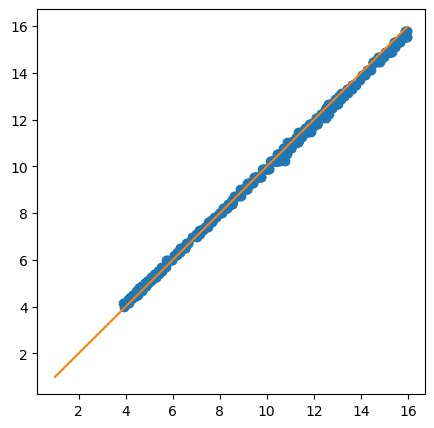

Train score:  0.9996646660757569
Test score:  0.9982381987392775
Regression score:  0.9982381987392775
Mean squared error:  0.023379411900499743
Mean absolute error:  0.12914806972222853
Root mean squared error:  0.1529032762909276


In [54]:
# Selecting only the box cox transformed predictor variables and target variable
x = data[[ 'Open_boxcox_transformed', 'High_boxcox_transformed', 'Low_boxcox_transformed', 'Adj Close_boxcox_transformed', 'VWAP_boxcox_transformed']]
y = data['Close_boxcox_transformed']

# Splitting the dataset into training and testing sets & standardizing the features using StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state = 42)

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

# Initializing Decision Tree Regressor model with hyperparameters and defining it with GridSearchCV
DTR = DecisionTreeRegressor(max_depth = 6, max_features = 7, min_samples_split = 10, random_state = 2)
param_grid = {"max_depth": [3, None, 6, 9], "max_features": [5, 7, 11, 15], "min_samples_split": [2, 3, 10], "random_state": [2, 4, 6]}
grid = GridSearchCV(estimator = DTR, param_grid = param_grid, cv = 5)
grid_result = grid.fit(x_train, y_train)

# Fitting the model with the best hyperparameters and predicting the target
DTR.fit(x_train,y_train)
y_prediction = DTR.predict(x_test)

# Plotting the predicted values against the true values
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(y_test, y_prediction, fmt = "o")
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()

# Evaluating the model performance after removing outliers
print("Train score: ", DTR.score(x_train,y_train))
print("Test score: ", DTR.score(x_test, y_test))
print("Regression score: ", r2_score(y_test, y_prediction))
print("Mean squared error: ", mean_squared_error(y_test, y_prediction))
print("Mean absolute error: ", mean_absolute_error(y_test, y_prediction))
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_prediction)))

The Decision Tree Regressor demonstrated exceptional performance on both the training and test datasets, with R-squared values of approximately 99.94%. These values suggest that the model captures a significant portion of the variance in the target variable. The low Mean Squared Error (MSE) of .023, Mean Absolute Error (MAE) of 0.1291, and Root Mean Squared Error (RMSE) of .152 signify accurate predictions with minimal deviation from the actual values. These metrics indicate a close fit of the model to the data.

**Conclusions derived:**

The presence or removal of outliers has a noticeable impact on the final predictive model.

**With Outliers:**
   Train score:  0.9995241479406052
   Test score:  0.9969188959602222
   Regression score:  0.9969188959602222
   Mean squared error:  76.59347087081709
   Mean absolute error:  6.268757618293362
   Root mean squared error:  8.75176958510775
   suggesting accurate predictions but with some deviation.

**After Removing Outliers:**
    Train score:  0.9996646660757569
    Test score:  0.9982381987392775
    Regression score:  0.9982381987392775
    Mean squared error:  0.023379411900499743
    Mean absolute error:  0.12914806972222853
    Root mean squared error:  0.1529032762909276
    indicating a more accurate fit with reduced deviation.

The removal of outliers appears to enhance the model's predictive performance resulting in lower error metrics and potentially reducing the risk of overfitting. This underscores the importance of outlier analysis and removal in refining and improving the predictive capabilities of the model.

# **Overall Conclusion**

* The dataset consists of 1 datetime, 2 categorical, and 12 numerical columns.
* Missing values in 'Trades', 'Deliverable Volume', and '%Deliverable' were filled with zero due to plausible reasons.
* Numeric columns exhibit right skewness with outliers at the higher end of the range.
* Feature selection methods highlighted 'Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP' as the most influential predictors for 'Close.'
* Decision Tree Regressor achieved high performance, but caution is needed to avoid overfitting in complex models.
* Pair plots reveal multicollinearity among predictor variables.
* Ranges of predictor variables such as 'Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP' make sense in a financial context.
* Distributions of numeric columns are extremely right-skewed, indicating the presence of outliers.
* Decision Tree Regressor performance remains exceptional after removing outliers, with reduced error metrics.
* Imputation methods show relatively stable bias, variance, and percentage error on residuals after random data removal.

In summary the dataset analysis involved the handling of missing values, understanding the feature importance, assessing multicollinearity, dealing with outliers, and evaluating model performance.

